# Omega ($\Omega$) Ratio

The Omega ratio is a weighted ratio of gains and losses above a threshold return. It captures more information about returns than similar metrics like the Sharpe ratio.

It does this by adding up the area under the distribution around the threshold return. The area above the threshold measures the weight of the gains. The area below the threshold measures the weight of the losses. The Omega ratio is the positive area divided by the negative area.

Sophisticated investors like hedge funds use the Omega ratio because alternative investments have long-tail risks not measured by other metrics like the Sharpe ratio. Even if you're not investing in exotic derivatives, the Omega ratio is useful.

- A normal distribution has a skew, which measures the symmetry of distribution, of 0.
- A normal distribution has a kurtosis (which measures outliers) of 3.

Using performance metrics that don't take the entire distribution into consideration misses important information about risk. Use the Omega ratio to capture it.

In [15]:
import yfinance as yf
import numpy as np
import pandas as pd

In [19]:
# Specify the Ticker
TICKER = "TSLA"

# Grab the data
data = yf.download(TICKER, start="2018-01-01", end="2025-09-01")

/tmp/ipykernel_5663/3648315083.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(TICKER, start="2018-01-01", end="2025-09-01")
[*********************100%***********************]  1 of 1 completed


Skew: 0.29688722434073334
Kurtosis: 3.6919907606064886
Omega Ratio: 1.148017479794992


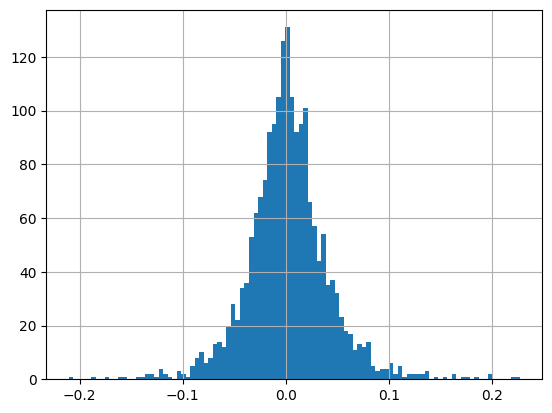

In [21]:
# Clean the close column - convert to numeric
data[("Close", TICKER)] = pd.to_numeric(data[("Close", TICKER)], errors='coerce')

# Remove any rows with NaN values in Close column
data = data.dropna(subset=[("Close", TICKER)])

# Now compute the returns
returns = data[("Close", TICKER)].pct_change()

# Create a function for the Omega Ratio
def omega_ratio(returns, required_return=0.0):

    # Annualize the return threshold
    return_threshold = (1 + required_return) ** (1 / 252) - 1

    # Substract the threshold from returns
    returns_less_thresh = returns - return_threshold

    numer = sum(returns_less_thresh[returns_less_thresh > 0.0])
    denom = -1.0 * sum(returns_less_thresh[returns_less_thresh < 0.0])

    if denom > 0.0:
        return numer / denom
    else:
        return np.nan

returns.hist(bins = 100)
print(f"Skew: {returns.skew()}")
print(f"Kurtosis: {returns.kurtosis()}")
print(f"Omega Ratio: {omega_ratio(returns, 0.07)}")